In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/raw/Obesity prediction.csv')

## Exploratory Data Analysis

In [138]:
#doing a T lets you see all the columns
df.head().T

,0,1,2,3,4
Gender,Female,Female,Male,Male,Male
Age,21.0,21.0,23.0,27.0,22.0
Height,1.62,1.52,1.8,1.8,1.78
Weight,64.0,56.0,77.0,87.0,89.8
family_history,yes,yes,yes,no,no
FAVC,no,no,no,no,no
FCVC,2.0,3.0,2.0,3.0,2.0
NCP,3.0,3.0,3.0,3.0,1.0
CAEC,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes
SMOKE,no,yes,no,no,no


In [139]:
df["Obesity"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

<Axes: xlabel='Weight', ylabel='Height'>

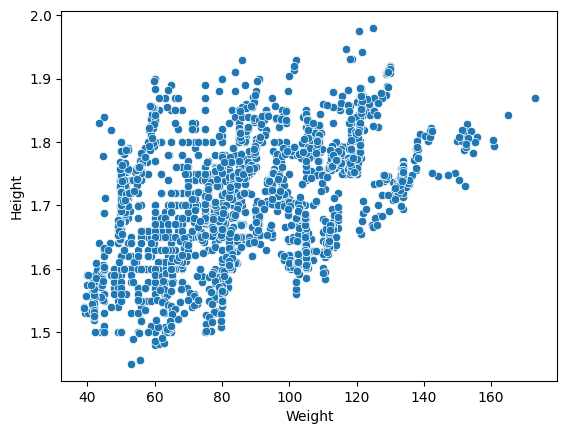

In [140]:
sns.scatterplot(df, x = "Weight", y = "Height")

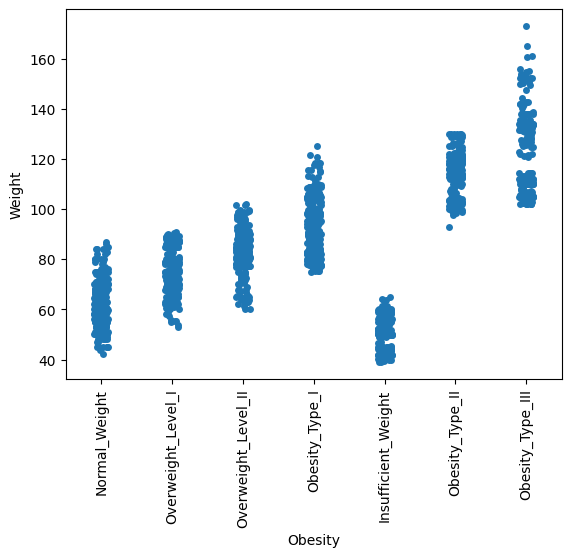

In [141]:
sns.stripplot(df, x = "Obesity", y = "Weight");
plt.xticks(rotation=90);

In [142]:
len(df)

2111

# Inspecting Columns

1. Check the dtypes of columns and recognize your numerical and categorical data
2. Check correlation of columns with your target


Remember :
- Columns that should be numeric are sometimes not numeric due to values like NA. 
- Check for missing values

In [143]:
#column types
df.dtypes
#to convert to numeric
#df.some_col = pd.to_numeric(df.some_col, errors='coerce')

Gender             object
Age               float64
Height            float64
Weight            float64
family_history     object
FAVC               object
FCVC              float64
NCP               float64
CAEC               object
SMOKE              object
CH2O              float64
SCC                object
FAF               float64
TUE               float64
CALC               object
MTRANS             object
Obesity            object
dtype: object

In [144]:
categorical = df.select_dtypes(include = "object").columns
numerical = df.select_dtypes(exclude = "object").columns
print(categorical)
print(numerical)

Index(['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC',
       'MTRANS', 'Obesity'],
      dtype='object')
Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


In [145]:
#see numner of missing data for each coluumns
any(df.isnull().sum()>0)

False

In [146]:
#Pandas way to convert categorical data to numerical data - if you dont care about ordering
#df["Obesity_pandas"] = df["Obesity"].astype("category").cat.codes
# sort Obesity by median weight and give it a number 
obesity_level = df.groupby("Obesity")["Weight"].median().sort_values().reset_index().reset_index(drop = False).rename(columns = {"index":"Obesity_level"})
df = df.merge(obesity_level[["Obesity_level", "Obesity"]], on = "Obesity", how = "left")
df[["Obesity", "Obesity_level"]].drop_duplicates().to_dict("records")

[{'Obesity': 'Normal_Weight', 'Obesity_level': 1},
 {'Obesity': 'Overweight_Level_I', 'Obesity_level': 2},
 {'Obesity': 'Overweight_Level_II', 'Obesity_level': 3},
 {'Obesity': 'Obesity_Type_I', 'Obesity_level': 4},
 {'Obesity': 'Insufficient_Weight', 'Obesity_level': 0},
 {'Obesity': 'Obesity_Type_II', 'Obesity_level': 6},
 {'Obesity': 'Obesity_Type_III', 'Obesity_level': 5}]

<Axes: xlabel='Obesity_binary', ylabel='count'>

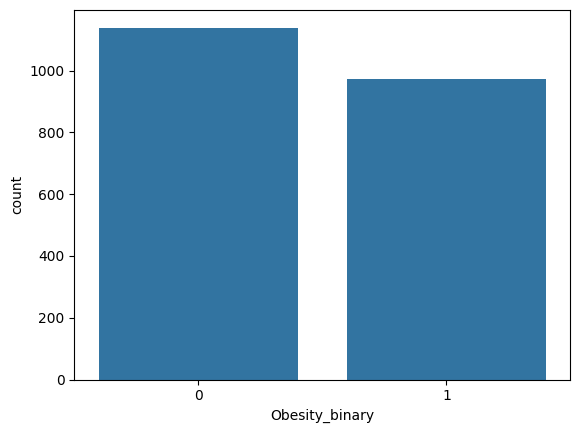

In [147]:
df["Obesity_binary"] = (df["Obesity_level"] > 3).astype(int)
sns.barplot(df["Obesity_binary"].value_counts(normalize = False))

#sns.barplot(df.groupby("Obesity_binary").mean().reset_index(), x = "Obesity_binary", y = "Weight");

## Inspecting numerical columns

1. Do a simple describe of your numerical columns
2. Check correlation of columns with your target"""

In [148]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Obesity_level,Obesity_binary
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,3.099479,0.460445
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,1.969568,0.498551
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,1.000000,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,3.000000,0.000000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,5.000000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,6.000000,1.000000


In [149]:
df[numerical].corrwith(df.Obesity_binary).sort_values(ascending=False)

Weight    0.793652
Age       0.217473
FCVC      0.174848
Height    0.137413
CH2O      0.097423
NCP       0.037004
TUE      -0.082742
FAF      -0.147097
dtype: float64

## Inspecting categorical columns

1. Check the value counts of your categorical columns
2. Check feature importance using mutual information score

Later we will do one-hot encoding of categorical columns

In [154]:
for c in categorical:
    print(df[c].value_counts(normalize = True))

Gender
Male      0.505921
Female    0.494079
Name: proportion, dtype: float64
family_history
yes    0.817622
no     0.182378
Name: proportion, dtype: float64
FAVC
yes    0.883941
no     0.116059
Name: proportion, dtype: float64
CAEC
Sometimes     0.836097
Frequently    0.114638
Always        0.025107
no            0.024159
Name: proportion, dtype: float64
SMOKE
no     0.979157
yes    0.020843
Name: proportion, dtype: float64
SCC
no     0.954524
yes    0.045476
Name: proportion, dtype: float64
CALC
Sometimes     0.663667
no            0.302700
Frequently    0.033160
Always        0.000474
Name: proportion, dtype: float64
MTRANS
Public_Transportation    0.748460
Automobile               0.216485
Walking                  0.026528
Motorbike                0.005211
Bike                     0.003316
Name: proportion, dtype: float64
Obesity
Obesity_Type_I         0.166272
Obesity_Type_III       0.153482
Obesity_Type_II        0.140692
Overweight_Level_I     0.137376
Overweight_Level_II    0.1

In [131]:
from sklearn.metrics import mutual_info_score
mutual_info_score(df.Obesity_binary, df.CALC)

0.012793712928434037

In [132]:
def mutual_info_obesity_score(series):
    return mutual_info_score(series, df.Obesity_binary)

mi = df[categorical].apply(mutual_info_obesity_score)
mi.sort_values(ascending=False)

Obesity           0.690015
family_history    0.110464
CAEC              0.081926
FAVC              0.045862
SCC               0.022762
MTRANS            0.012838
CALC              0.012794
SMOKE             0.000067
Gender            0.000001
dtype: float64